## Multiclass classification for Fashin mnist with TF20 Eager Mode Code

![](https://tensorflow.org/images/fashion-mnist-sprite.png)

### References
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://github.com/zalandoresearch/fashion-mnist

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images_npy, train_labels_npy), (test_images_npy, test_labels_npy) = fashion_mnist.load_data()

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images_npy.shape


(60000, 28, 28)

In [5]:
train_labels_npy.shape

(60000,)

In [6]:
train_labels_npy[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [7]:
test_images_npy.shape


(10000, 28, 28)

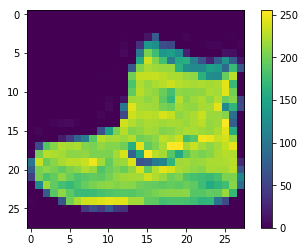

In [8]:
plt.figure()
plt.imshow(train_images_npy[0])
plt.colorbar()
plt.grid(False)
plt.show()

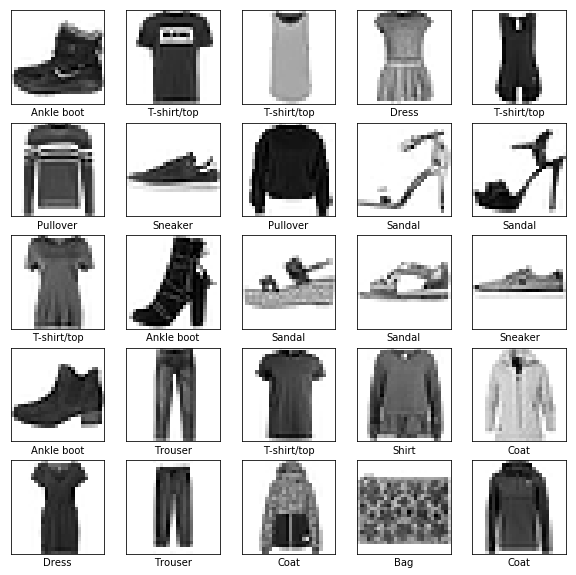

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_npy[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_npy[i]])
plt.show()

In [11]:
def convert_types(image, label):
  image = tf.cast(image.reshape(-1,28*28), tf.float64)
  image /= 255
  label = tf.cast(label.reshape(-1,1), tf.float64)
  return image, label

In [12]:
type(train_images_npy), type(train_labels_npy), type(test_images_npy), type(test_labels_npy) 

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [13]:
train_images, train_labels = convert_types(train_images_npy, train_labels_npy)
test_images, test_labels = convert_types(test_images_npy, test_labels_npy)

In [14]:
type(train_images), type(train_labels), type(test_images), type(test_labels) 

(tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor,
 tensorflow.python.framework.ops.EagerTensor)

In [15]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [16]:
class SimpleNNModel(Model):
  def __init__(self, layers, activations):
    super(SimpleNNModel, self).__init__()
    self.layer_objects = []
    for layer, activation in zip(layers, activations):
        self.layer_objects.append(Dense(layer, activation=activation))
    self.layer_objects.append(Dense(10, activation='softmax'))

  def call(self, x):
    for layer_object in self.layer_objects:
        x = layer_object(x)
    return x

In [17]:
layers = [10, 20, 30, 40, 128, 20]
activations = ["relu", "relu", "relu", "relu", "relu", "relu"]

model = SimpleNNModel(layers, activations)

In [18]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_images.shape

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6672 - accuracy: 0.7498
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.4704 - accuracy: 0.8276
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4219 - accuracy: 0.8454
Epoch 4/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3975 - accuracy: 0.8540
Epoch 5/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3811 - accuracy: 0.8603
Epoch 6/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3714 - accuracy: 0.8630
Epoch 7/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3602 - accuracy: 0.8664
Epoch 8/10
24256/60000 [===========>..................] - ETA: 1s - loss: 0.3512 - accuracy: 0.8689

KeyboardInterrupt: 

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.4182 - accuracy: 0.8463
테스트 정확도: 0.8463


In [22]:
predictions = model.predict(test_images)


In [23]:
predictions[0]


array([5.4055895e-04, 3.4163412e-04, 2.0825313e-05, 3.9532500e-07,
       6.1703249e-05, 5.7452517e-03, 1.2787966e-03, 4.7754414e-02,
       5.8956962e-04, 9.4366682e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])


9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

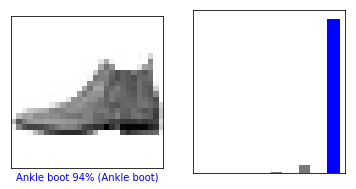

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels_npy, test_images_npy)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels_npy)
plt.show()

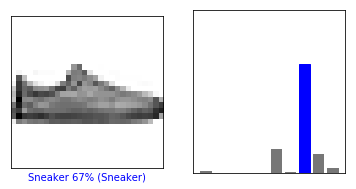

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels_npy, test_images_npy)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

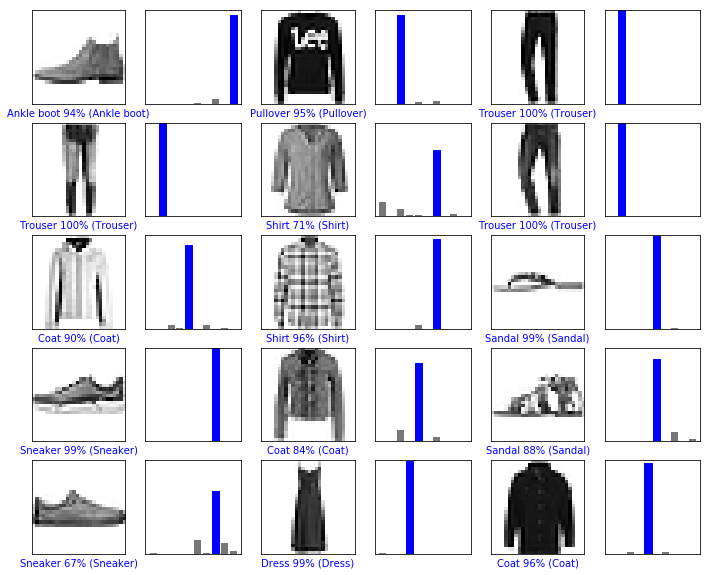

In [28]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels_npy, test_images_npy)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()